**Set environment**

In [19]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(source("../config/config_func.R")))
library(pheatmap)
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
### set file paths
fdiry  = file.path(
    FD_RES, 
    "results",
    "region",
    "KS91_K562_ASTARRseq_peak_macs_input",
    "summary"
)
fname = paste("peak", "screened", "fcc", "total", "tsv", sep = ".")
fpath = file.path(fdiry, fname)

### read table
dat = read_tsv(fpath)

###
dat_peak_screened = dat
print(dim(dat))
head(dat)

Rows: 732434 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): Chrom, Peak, Assay_Type, Assay_Label
dbl (3): Start, End, Score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 732434      7


Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,-0.01311792,ASTARR,ASTARR_T
chr1,100010437,100010915,chr1:100010437-100010915,-0.80687947,ASTARR,ASTARR_T
chr1,10002087,10003910,chr1:10002087-10003910,-0.34892859,ASTARR,ASTARR_T
chr1,100021298,100021629,chr1:100021298-100021629,-1.03799571,ASTARR,ASTARR_T
chr1,100023727,100023976,chr1:100023727-100023976,-0.19100207,ASTARR,ASTARR_T
chr1,100027983,100029702,chr1:100027983-100029702,-0.18001582,ASTARR,ASTARR_T


In [3]:
dat = dat_peak_screened
dat = dat %>% dplyr::select(Peak, Score, Assay_Type)
dat = dat %>% tidyr::spread(Assay_Type, Score)

###
dat_peak_scores = dat
print(dim(dat))
head(dat)

[1] 246855      9


Peak,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,ENCODE-E2G_Benchmark,ENCODE-E2G_Prediction,LMPRA,TMPRA,WSTARR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100006256-100006880,-0.01311792,NA,NA,NA,NA,NA,NA,-0.48849764
chr1:100010437-100010915,-0.80687947,NA,NA,NA,NA,NA,NA,-0.30895395
chr1:10002087-10003910,-0.34892859,NA,NA,NA,NA,NA,NA,-0.38624192
chr1:100021298-100021629,-1.03799571,NA,NA,NA,NA,NA,NA,-0.59404974
chr1:100023727-100023976,-0.19100207,NA,NA,NA,NA,NA,NA,0.04988694
chr1:100027983-100029702,-0.18001582,-0.05102367,NA,NA,0.05535,NA,NA,-0.22927538


In [4]:
dat = dat_peak_screened
lst = split(dat$Score, dat$Assay_Type)
lst_vec_num_score = lst
lapply(lst, head)

$ASTARR
[1] -0.01311792 -0.80687947 -0.34892859 -1.03799571 -0.19100207 -0.18001582

$`CRISPRi-Growth`
[1] -0.05102367 -0.01002465 -0.38439940  0.04211337 -0.09616000 -0.04872222

$`CRISPRi-HCRFF`
[1] -0.08308383 -0.12006903  0.10643558  0.98158422  0.22095793 -0.05128921

$`ENCODE-E2G_Benchmark`
[1] -0.015760000  0.005147500  0.005208000  0.001423333 -0.002890000
[6] -0.019910000

$`ENCODE-E2G_Prediction`
[1] 0.05535 0.98741 0.07830 0.14007 0.28972 0.99333

$LMPRA
[1]  4.9392678 -1.2400663 -0.2470887  3.1348441 -0.4649266 -0.1236472

$TMPRA
[1] -0.7592992 -0.4159155  0.2420861  0.9418955 -0.8541150 -0.7215339

$WSTARR
[1] -0.48849764 -0.30895395 -0.38624192 -0.59404974  0.04988694 -0.22927538

In [5]:
dat = dat_peak_screened
lst = split(dat$Score, dat$Assay_Type)
lst = lapply(lst, function(vec){summary(vec)})

lst_vec_num_range = lst
print(lst)

$ASTARR
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-8.31132 -0.32792  0.01359  0.05892  0.42169  4.55950 

$`CRISPRi-Growth`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.231664 -0.125790 -0.015193  0.000656  0.100296  5.539906 

$`CRISPRi-HCRFF`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.79602 -0.09309 -0.02741  0.01556  0.05958  4.82946 

$`ENCODE-E2G_Benchmark`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.930000 -0.024425 -0.006095 -0.013355  0.009698  0.208575 

$`ENCODE-E2G_Prediction`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00003 0.06296 0.21908 0.38281 0.74137 1.00000 

$LMPRA
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.9685  0.4997  1.3286  1.6950  2.6032 11.2148 

$TMPRA
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.439058 -0.678092 -0.001937  0.314684  1.003965  6.104344 

$WSTARR
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.71138 -0.25013 -0.03281 -0.01136  0.201

In [6]:
lst = lst_vec_num_range
lst[["ASTARR"]]["Min."]

     Min. 
-8.311321 

In [7]:
lst = lst_vec_num_range
num = lst[["ASTARR"]][["Min."]]
print(class(num))
print(num)

[1] "numeric"
[1] -8.311321


In [8]:
lst = lst_vec_num_range
vec = names(lst)
idx = str_detect(vec, "ENCODE-E2G")
vec = vec[!idx]

#tmp = combn(vec, 2) |> as.data.frame()
tmp = expand.grid(vec, vec) |> t() |> as.data.frame()
lst = lapply(tmp, function(vec_txt_assay){
    ###
    txt_assay1 = vec_txt_assay[1]
    txt_assay2 = vec_txt_assay[2]

    ###
    dat = dat_peak_scores
    dat = dat %>%
        dplyr::select({{vec_txt_assay}}) %>%
        na.omit

    ###
    res      = cor(dat, method="spearman")
    num_corr = res[txt_assay1, txt_assay2]
    num_size = nrow(dat)

    ###
    res = list(
        "Assay1"      = txt_assay1, 
        "Assay2"      = txt_assay2, 
        "Count"       = num_size,
        "Correlation" = num_corr)
    return(res)
})
dat = bind_rows(lst)

dat_score_corr = dat
print(dim(dat))
dat

[1] 36  4


Assay1,Assay2,Count,Correlation
<chr>,<chr>,<int>,<dbl>
ASTARR,ASTARR,246850,1.000000000
CRISPRi-Growth,ASTARR,80288,-0.018035144
CRISPRi-HCRFF,ASTARR,1330,0.064354946
LMPRA,ASTARR,68420,0.203478532
TMPRA,ASTARR,1722,0.208043995
WSTARR,ASTARR,246683,0.239029242
ASTARR,CRISPRi-Growth,80288,-0.018035144
CRISPRi-Growth,CRISPRi-Growth,80288,1.000000000
CRISPRi-HCRFF,CRISPRi-Growth,558,0.070265702


In [9]:
dat = dat_score_corr
dat = dat %>% dplyr::mutate(Correlation = as.double(Correlation))
dat = dat %>% 
    dplyr::select(Assay1, Assay2, Correlation) %>%
    tidyr::spread(Assay2, Correlation)
dat = dat %>% column_to_rownames("Assay1")

mat_score_corr = dat
vec = c("ASTARR", "LMPRA", "TMPRA", "WSTARR", "CRISPRi-Growth", "CRISPRi-HCRFF")
round(dat[vec, vec], 2)

,ASTARR,LMPRA,TMPRA,WSTARR,CRISPRi-Growth,CRISPRi-HCRFF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ASTARR,1.00,0.20,0.21,0.24,-0.02,0.06
LMPRA,0.20,1.00,0.44,0.40,0.07,0.02
TMPRA,0.21,0.44,1.00,0.54,0.15,0.00
WSTARR,0.24,0.40,0.54,1.00,0.09,0.04
CRISPRi-Growth,-0.02,0.07,0.15,0.09,1.00,0.07
CRISPRi-HCRFF,0.06,0.02,0.00,0.04,0.07,1.00


In [10]:
range(dat_score_corr$Correlation)

[1] -0.01803514  1.00000000

In [13]:
mat = mat_score_corr

paletteLength <- 50
myColor  <- colorRampPalette(c("#abd9e9", "white", "#d73027"))(paletteLength)
myBreaks <- c(
    seq(-0.05, 0, length.out=ceiling(paletteLength/2) + 1), 
    seq(1/paletteLength, 1, length.out=floor(paletteLength/2)))

In [15]:
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}

png 
  2

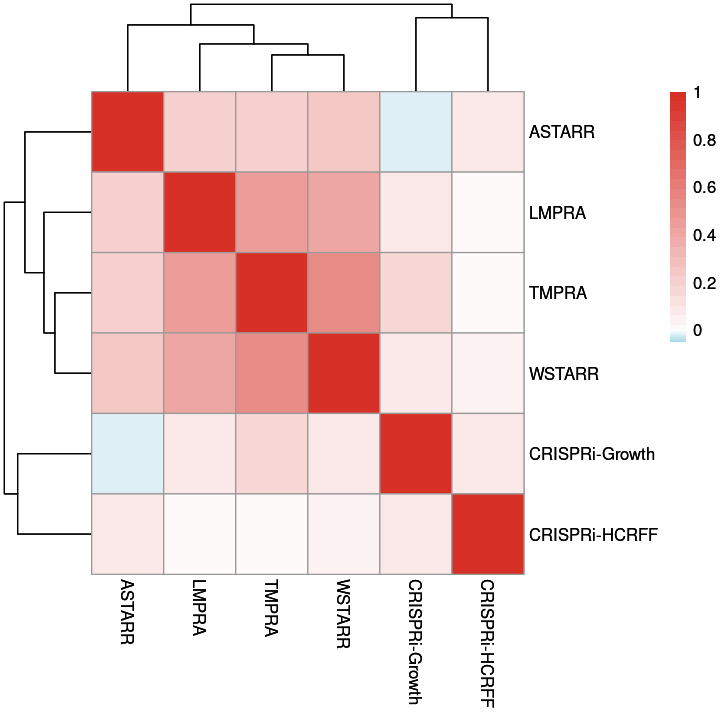

In [18]:
options(repr.plot.height=6, repr.plot.width=6)

mat = mat_score_corr
plt = pheatmap(
    mat,
    color=myColor, 
    breaks=myBreaks
)
save_pheatmap_pdf(plt, "fig_fcc_signal_correlation_simple.pdf")
plt

In [11]:
mat = mat_score_corr

paletteLength <- 50
myColor  <- colorRampPalette(c("#abd9e9", "white", "#d73027"))(paletteLength)
myBreaks <- c(
    seq(-0.05, 0, length.out=ceiling(paletteLength/2) + 1), 
    seq(1/paletteLength, 0.6, length.out=floor(paletteLength/2)))

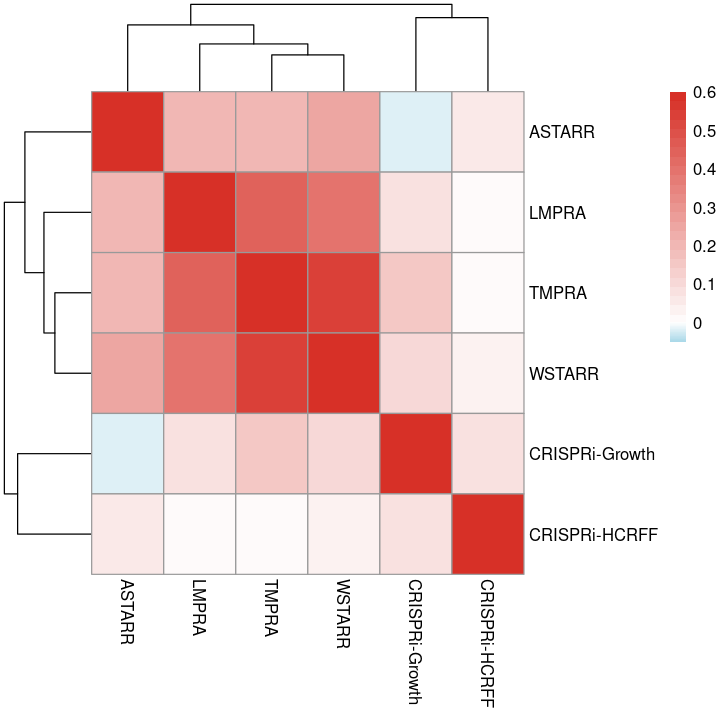

In [12]:
options(repr.plot.height=6, repr.plot.width=6)

mat = mat_score_corr
pheatmap(
    mat,
    color=myColor, 
    breaks=myBreaks
)

In [54]:
dat = lst[[1]]
head(dat)

ASTARR,CRISPRi-Growth
<dbl>,<dbl>
-0.18001582,-0.05102367
1.05334187,-0.01002465
1.82193449,-0.38439940
-0.25276784,0.04211337
-0.57228936,-0.09616000
-0.05529085,-0.04872222


In [86]:
dat = dat_peak_screened
head(dat)

Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,-0.01311792,ASTARR,ASTARR_T
chr1,100010437,100010915,chr1:100010437-100010915,-0.80687947,ASTARR,ASTARR_T
chr1,10002087,10003910,chr1:10002087-10003910,-0.34892859,ASTARR,ASTARR_T
chr1,100021298,100021629,chr1:100021298-100021629,-1.03799571,ASTARR,ASTARR_T
chr1,100023727,100023976,chr1:100023727-100023976,-0.19100207,ASTARR,ASTARR_T
chr1,100027983,100029702,chr1:100027983-100029702,-0.18001582,ASTARR,ASTARR_T


## Plot scatter plot

Warning message:
“Removed 92 rows containing non-finite values (`stat_binhex()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_hex()`).”


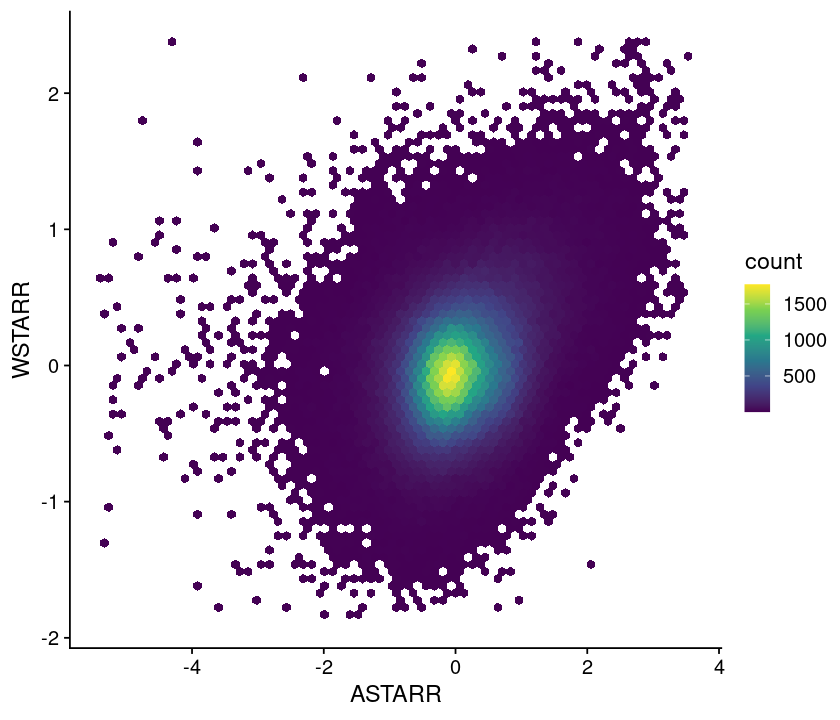

In [130]:
vec_txt_assay = c("ASTARR", "WSTARR")
txt_assay1 = vec_txt_assay[1]
txt_assay2 = vec_txt_assay[2]

num_prob = 0.0001
vec_num_prob   = c(num_prob, 1-num_prob)
vec_num_score1 = lst_vec_num_score[[txt_assay1]]
vec_num_score2 = lst_vec_num_score[[txt_assay2]]
vec_num_range1 = quantile(vec_num_score1, probs = vec_num_prob)
vec_num_range2 = quantile(vec_num_score2, probs = vec_num_prob)

dat = dat_peak_scores
dat = dat %>% dplyr::select({{vec_txt_assay}}) %>% na.omit

gpt = ggplot(dat, aes(x=ASTARR, y=WSTARR)) +
    geom_hex(bins=70) +
    scale_fill_viridis_c() +
    theme_cowplot() +
    xlim(vec_num_range1) +
    ylim(vec_num_range2)

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

In [200]:
lst = lst_vec_num_range
vec = names(lst)
idx = str_detect(vec, "ENCODE-E2G")
vec = vec[!idx]
tmp = expand.grid(vec, vec) %>% 
    dplyr::filter(Var1 != Var2) %>% 
    dplyr::mutate(Var1 = factor(Var1, levels=vec)) %>%
    dplyr::mutate(Var2 = factor(Var2, levels=vec)) %>%
    dplyr::arrange(Var1, Var2) %>%
    t %>% 
    as.data.frame
lst = lapply(tmp, function(vec){
    txt = paste(vec, collapse = "_")
    txt = str_replace_all(txt, "-", "_")
})
vec = unlist(lst)
colnames(tmp) = vec
tmp

,ASTARR_CRISPRi_Growth,ASTARR_CRISPRi_HCRFF,ASTARR_LMPRA,ASTARR_TMPRA,ASTARR_WSTARR,CRISPRi_Growth_ASTARR,CRISPRi_Growth_CRISPRi_HCRFF,CRISPRi_Growth_LMPRA,CRISPRi_Growth_TMPRA,CRISPRi_Growth_WSTARR,⋯,TMPRA_ASTARR,TMPRA_CRISPRi_Growth,TMPRA_CRISPRi_HCRFF,TMPRA_LMPRA,TMPRA_WSTARR,WSTARR_ASTARR,WSTARR_CRISPRi_Growth,WSTARR_CRISPRi_HCRFF,WSTARR_LMPRA,WSTARR_TMPRA
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Var1,ASTARR,ASTARR,ASTARR,ASTARR,ASTARR,CRISPRi-Growth,CRISPRi-Growth,CRISPRi-Growth,CRISPRi-Growth,CRISPRi-Growth,⋯,TMPRA,TMPRA,TMPRA,TMPRA,TMPRA,WSTARR,WSTARR,WSTARR,WSTARR,WSTARR
Var2,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR,ASTARR,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR,⋯,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,WSTARR,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA


In [201]:
lst = lst_vec_num_range
vec = names(lst)
idx = str_detect(vec, "ENCODE-E2G")
vec = vec[!idx]
tmp = expand.grid(vec, vec) %>% 
    dplyr::filter(Var1 != Var2) %>% 
    dplyr::mutate(Var1 = factor(Var1, levels=vec)) %>%
    dplyr::mutate(Var2 = factor(Var2, levels=vec)) %>%
    dplyr::arrange(Var1, Var2) %>%
    t %>% 
    as.data.frame
lst = lapply(tmp, function(vec){
    txt = paste(vec, collapse = "_")
    txt = str_replace_all(txt, "-", "_")
})
vec = unlist(lst)
colnames(tmp) = vec

lst = lapply(tmp, function(vec_txt_assay){

    txt_assay1 = vec_txt_assay[1]
    txt_assay2 = vec_txt_assay[2]

    num_prob = 0.0001
    vec_num_prob   = c(num_prob, 1-num_prob)
    vec_num_score1 = lst_vec_num_score[[txt_assay1]]
    vec_num_score2 = lst_vec_num_score[[txt_assay2]]
    vec_num_range1 = quantile(vec_num_score1, probs = vec_num_prob)
    vec_num_range2 = quantile(vec_num_score2, probs = vec_num_prob)
    
    dat = dat_peak_scores
    dat = dat %>% dplyr::select({{vec_txt_assay}}) %>% na.omit
    
    gpt = ggplot(dat, aes(x = .data[[txt_assay1]], y = .data[[txt_assay2]]))
    gpt = gpt +    
        geom_hex(bins=70) +
        scale_fill_viridis_c() +
        theme_cowplot() +
        xlim(vec_num_range1) +
        ylim(vec_num_range2)
    
    return(gpt)
})

lst_gpt_pairs_scatter = lst
names(lst)

In [202]:
names(lst)

[1] "ASTARR_CRISPRi_Growth"        "ASTARR_CRISPRi_HCRFF"        
 [3] "ASTARR_LMPRA"                 "ASTARR_TMPRA"                
 [5] "ASTARR_WSTARR"                "CRISPRi_Growth_ASTARR"       
 [7] "CRISPRi_Growth_CRISPRi_HCRFF" "CRISPRi_Growth_LMPRA"        
 [9] "CRISPRi_Growth_TMPRA"         "CRISPRi_Growth_WSTARR"       
[11] "CRISPRi_HCRFF_ASTARR"         "CRISPRi_HCRFF_CRISPRi_Growth"
[13] "CRISPRi_HCRFF_LMPRA"          "CRISPRi_HCRFF_TMPRA"         
[15] "CRISPRi_HCRFF_WSTARR"         "LMPRA_ASTARR"                
[17] "LMPRA_CRISPRi_Growth"         "LMPRA_CRISPRi_HCRFF"         
[19] "LMPRA_TMPRA"                  "LMPRA_WSTARR"                
[21] "TMPRA_ASTARR"                 "TMPRA_CRISPRi_Growth"        
[23] "TMPRA_CRISPRi_HCRFF"          "TMPRA_LMPRA"                 
[25] "TMPRA_WSTARR"                 "WSTARR_ASTARR"               
[27] "WSTARR_CRISPRi_Growth"        "WSTARR_CRISPRi_HCRFF"        
[29] "WSTARR_LMPRA"                 "WSTARR_TMPRA"

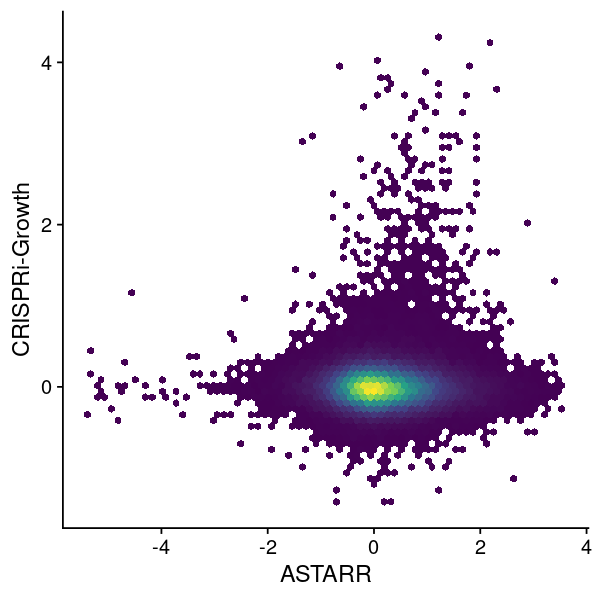

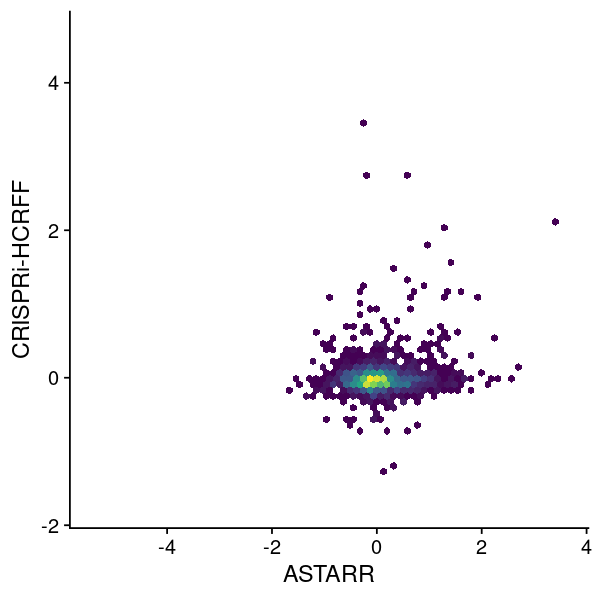

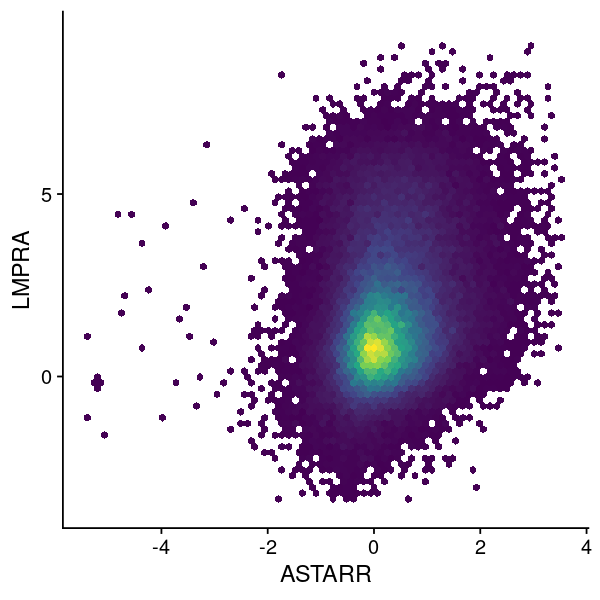

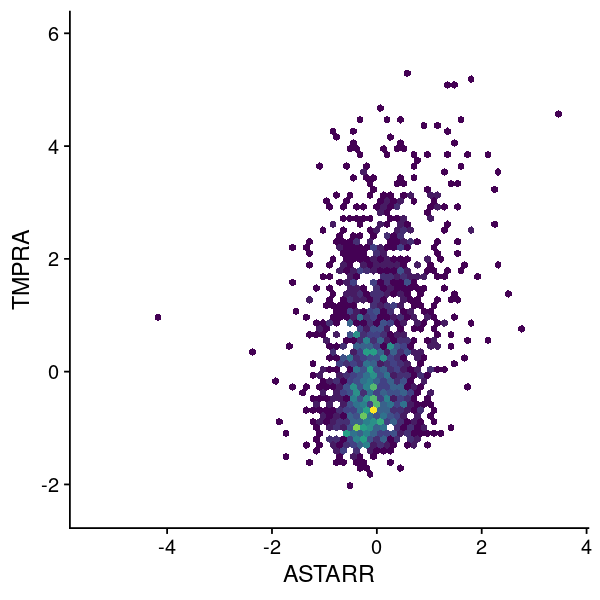

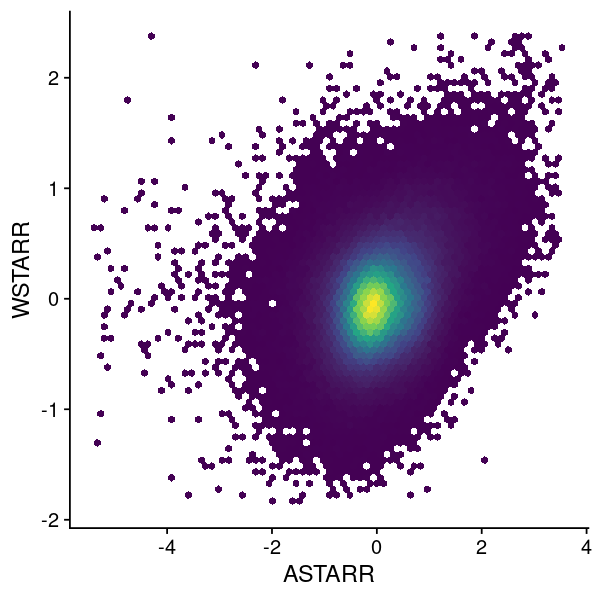

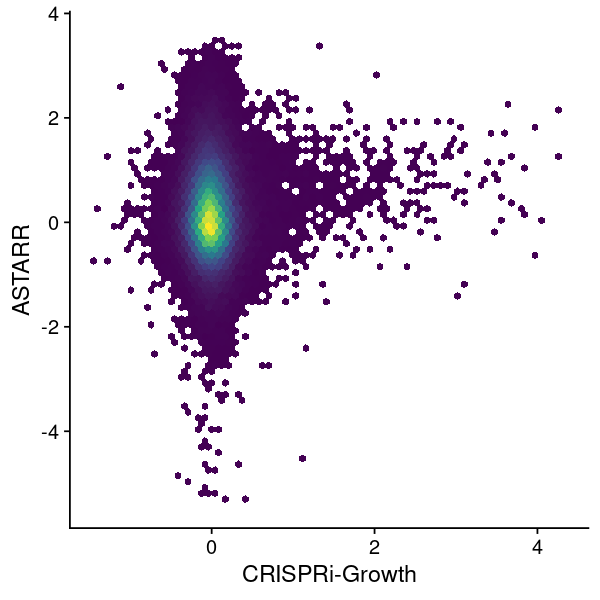

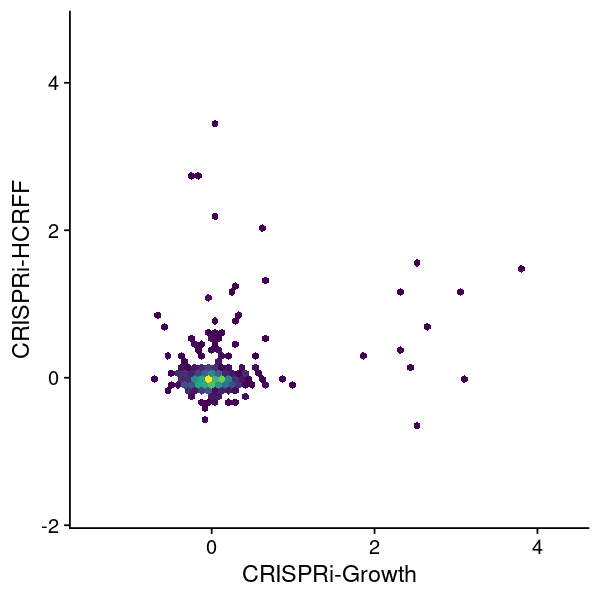

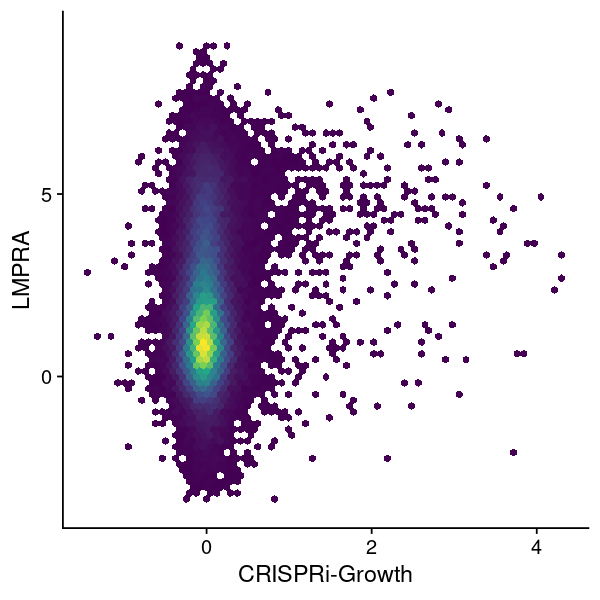

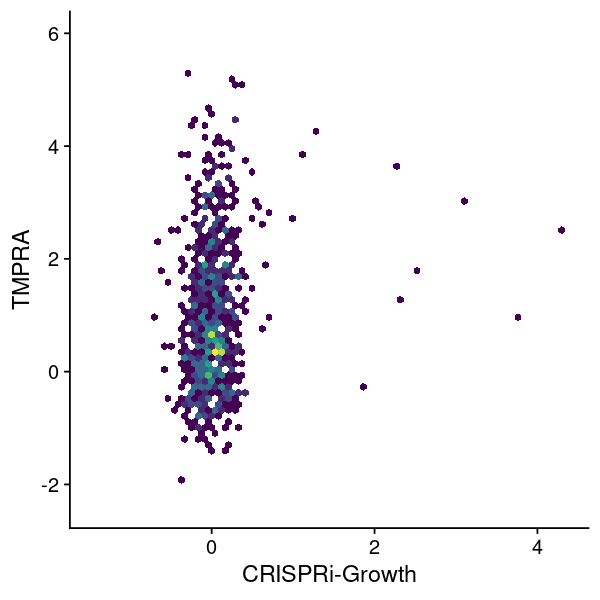

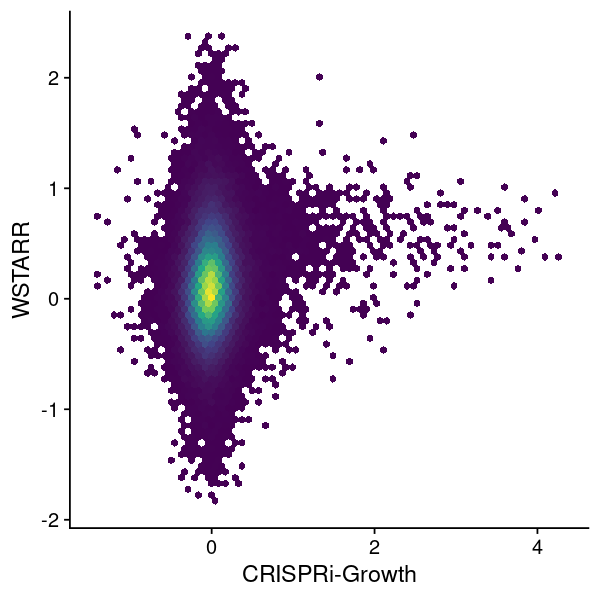

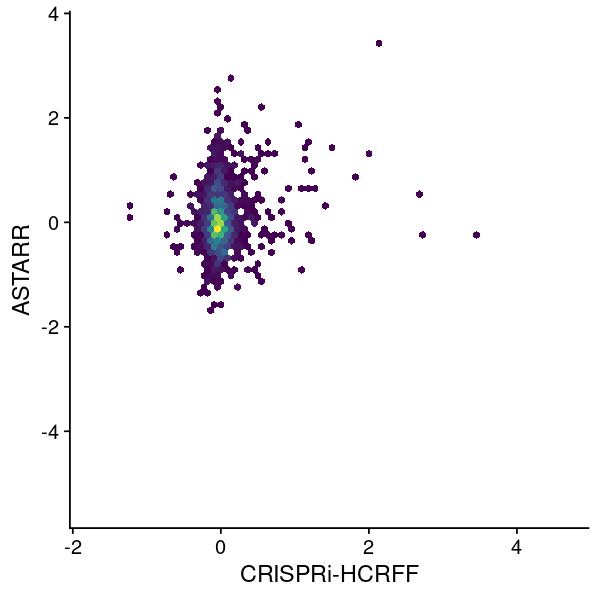

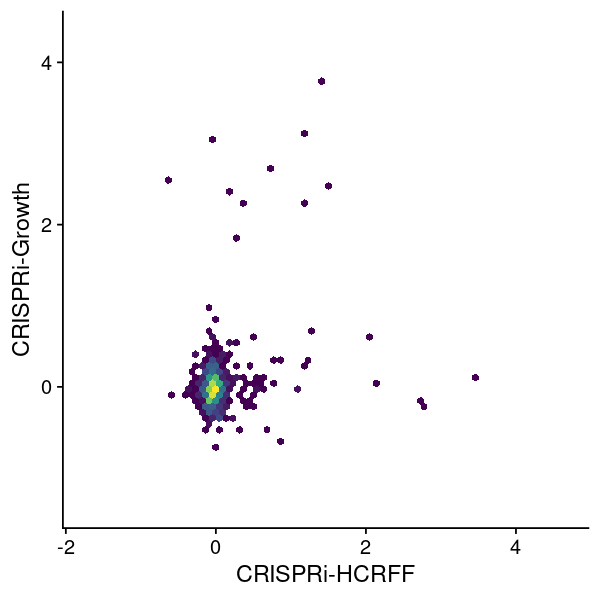

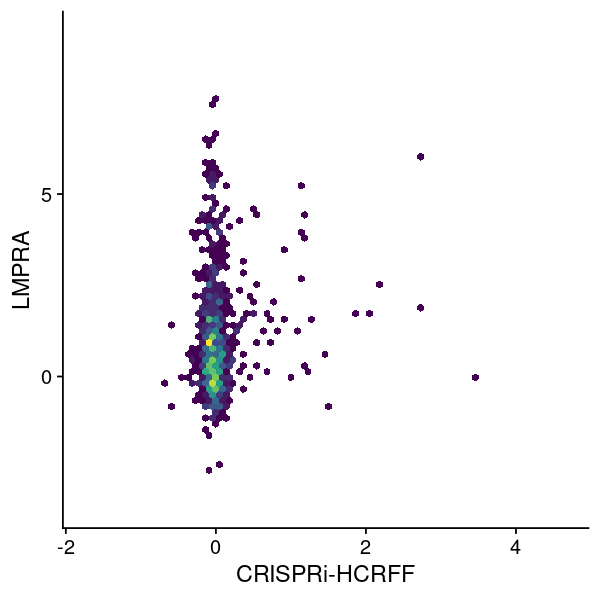

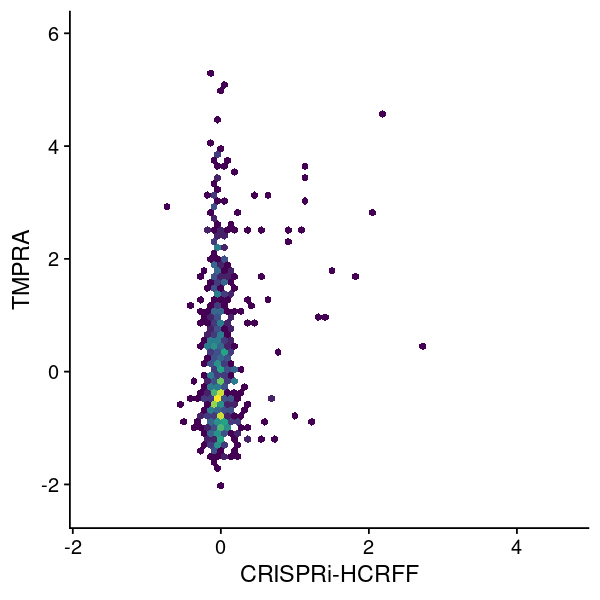

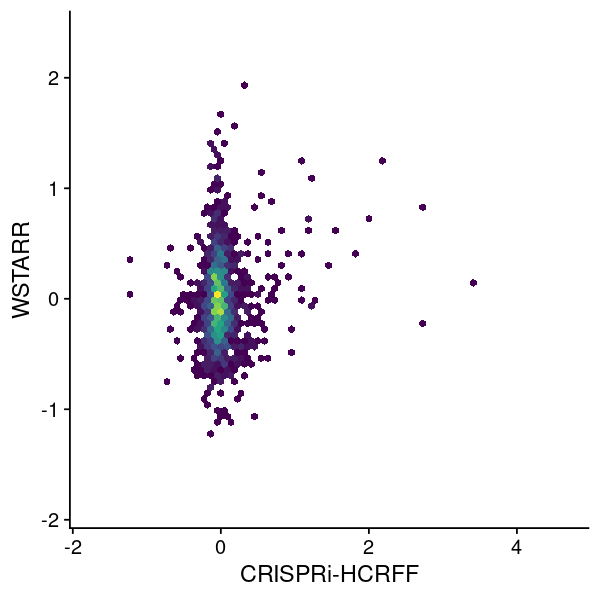

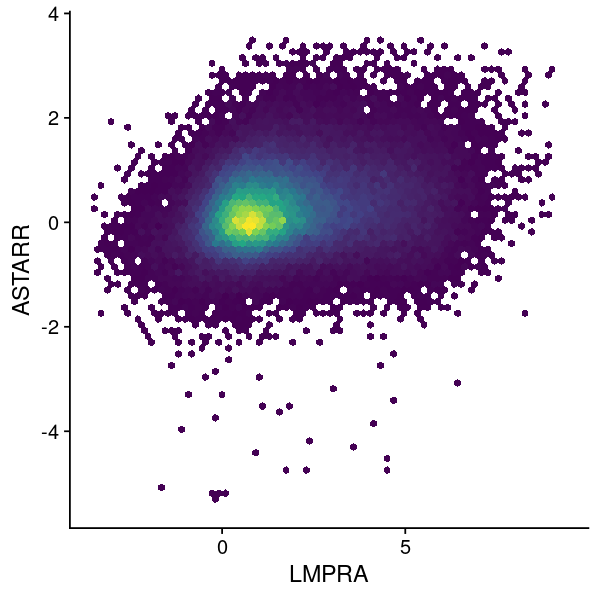

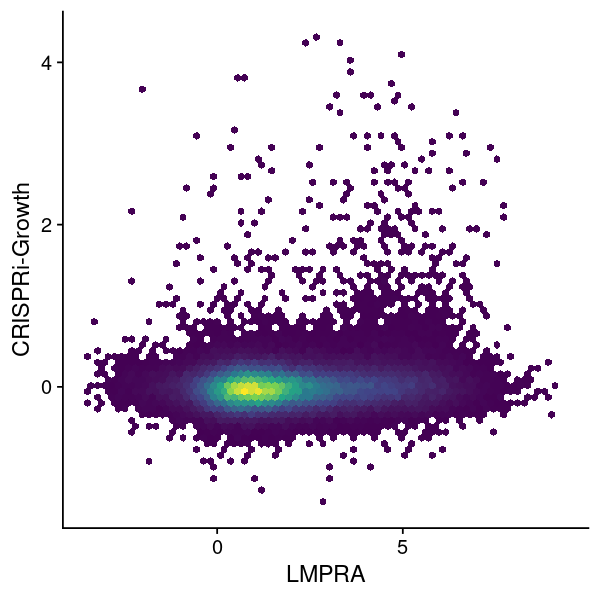

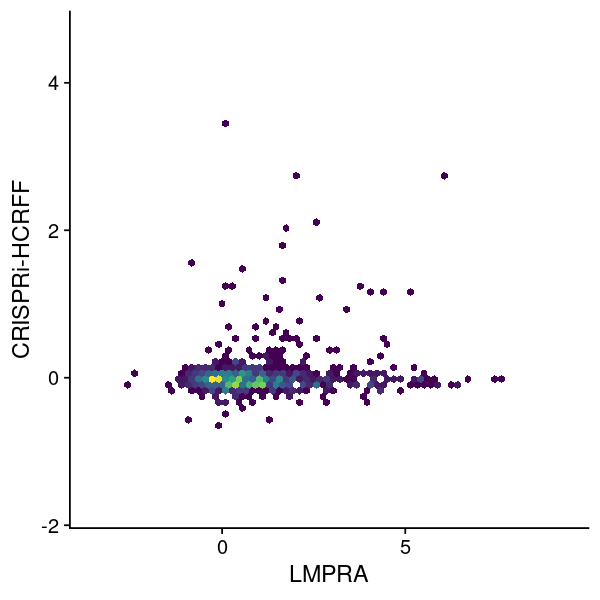

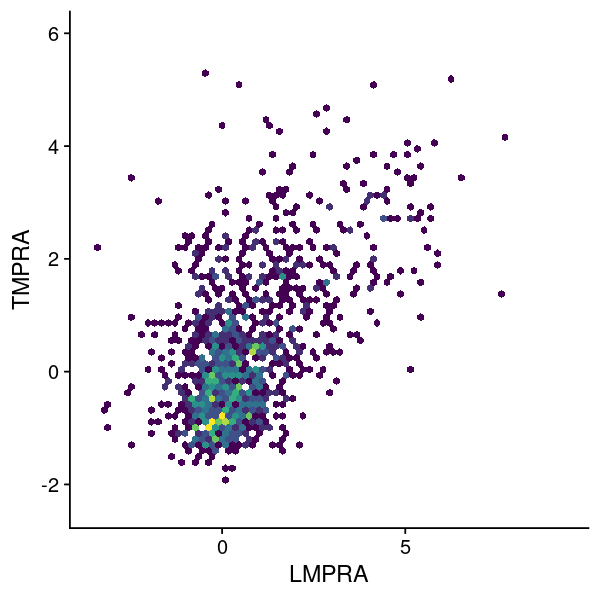

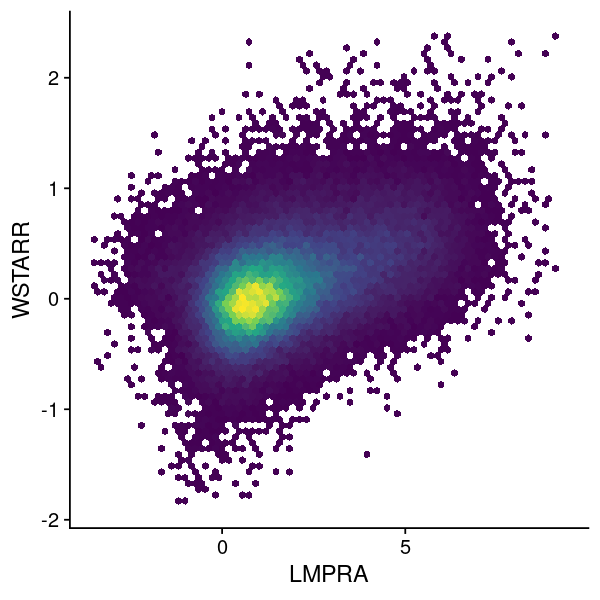

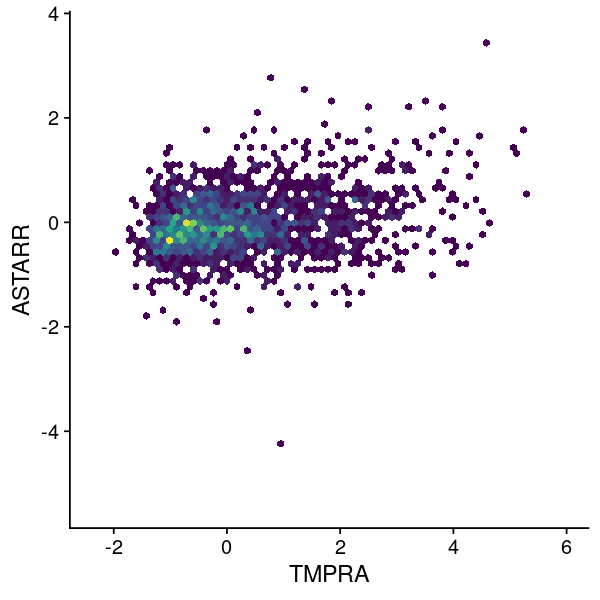

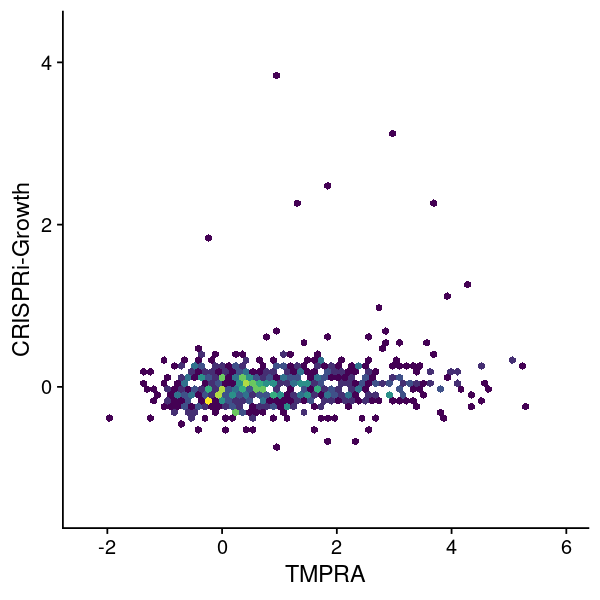

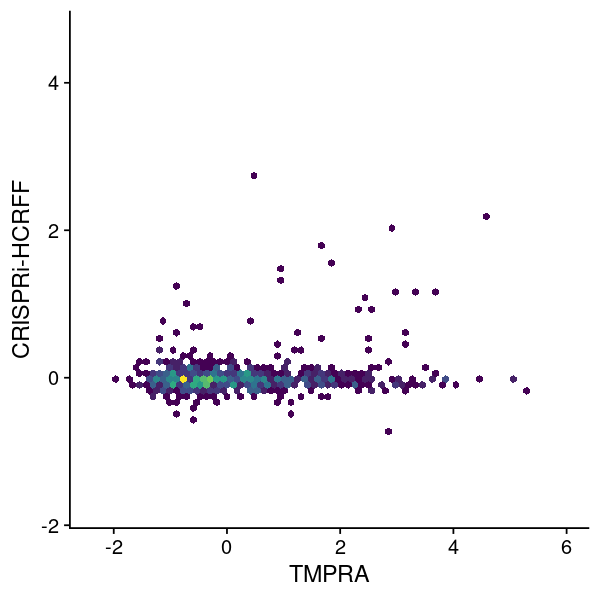

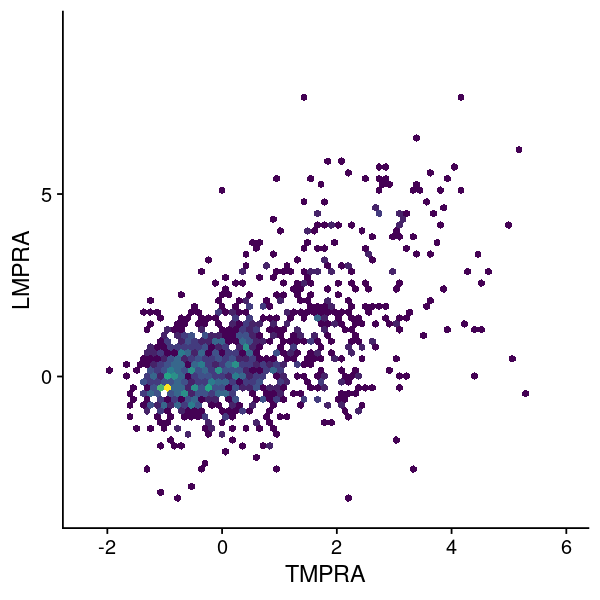

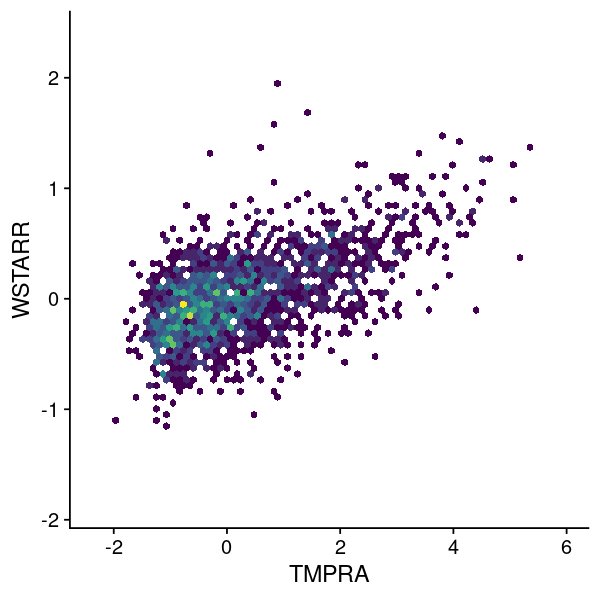

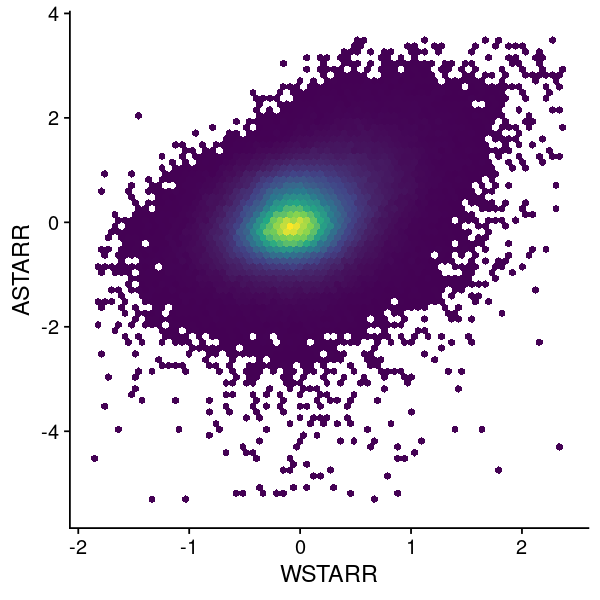

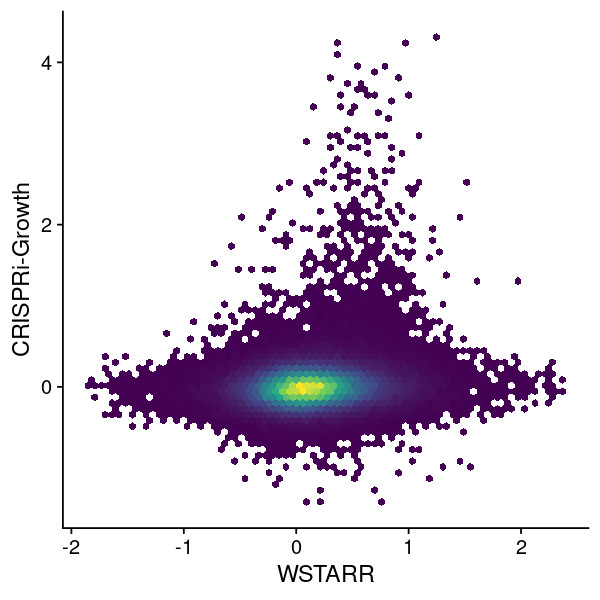

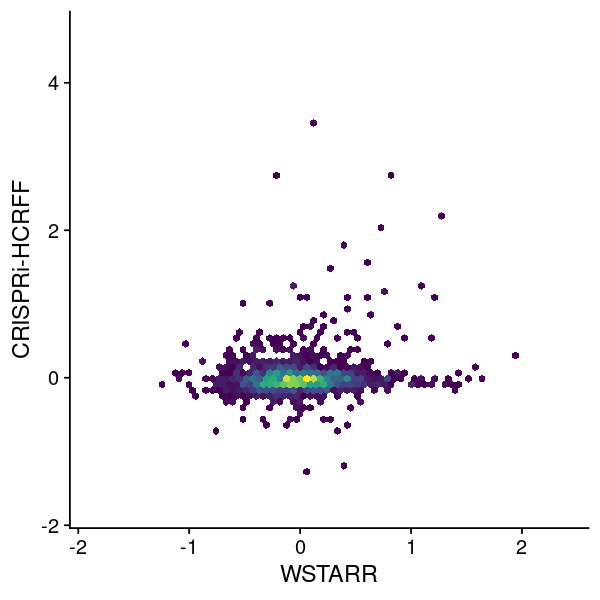

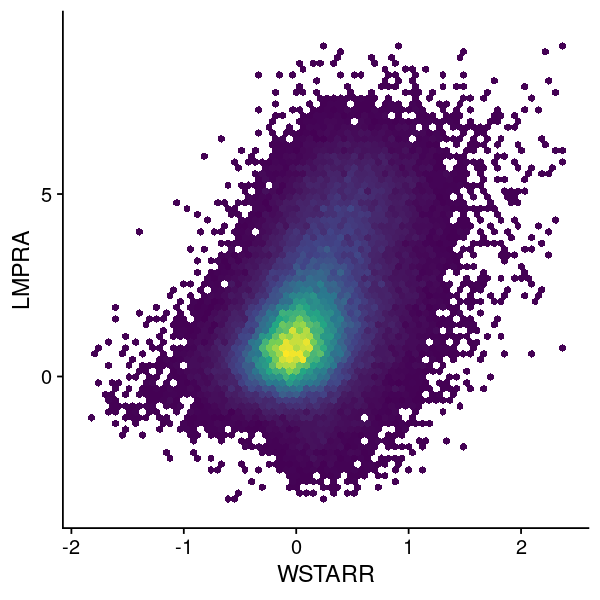

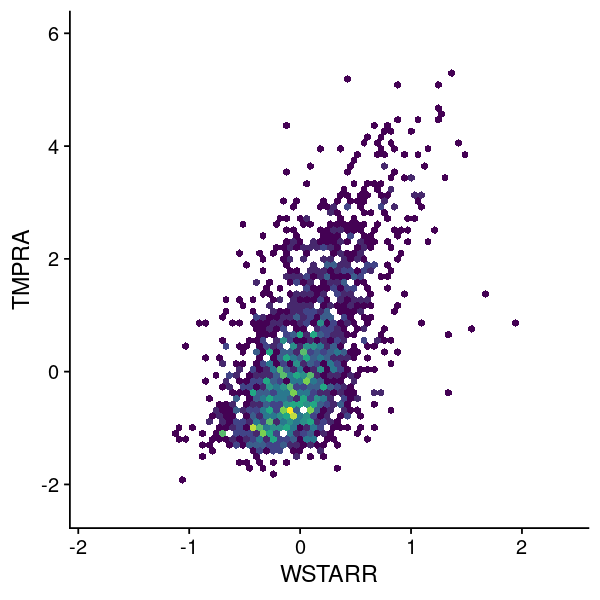

In [206]:
options(repr.plot.height=5, repr.plot.width=5)
lst = lst_gpt_pairs_scatter
for (txt in names(lst)){
    fname = paste0("fig_pairs_hex_", txt, ".png")
    gpt = lst[[txt]]
    
    gpt = gpt + theme(legend.position = "None")
    suppressWarnings(print(gpt))
    
    gpt = gpt + labs(x="", y="")
    suppressWarnings(ggsave(fname, gpt, width = 3, height = 3))
}

In [ ]:
vec_txt_assay = c("WSTARR", "ASTARR")
dat = dat_peak_scores
dat = dat %>% dplyr::select({{vec_txt_assay}}) %>% na.omit

gpt = ggplot(dat, aes(x=ASTARR, y=WSTARR)) +
    geom_hex(bins=70) +
    scale_fill_viridis_c() +
    theme_cowplot() +
    xlim(-5, 5) +
    ylim(-5, 5)

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

In [ ]:
num_prob = 0.001
    vec_num_range = quantile(
        vec_num_score, 
        probs = c(num_prob, 1-num_prob)
    )

    gpt = ggplot(dat_num_score, aes(x=Score)) + 
        geom_histogram(bins = 70) + 
        labs(x="", y="Count", title=txt_assay) +
        theme_cowplot()
    
    gpt = suppressWarnings(gpt + xlim(vec_num_range))
    suppressWarnings(print(gpt))

## Plot histogram

Warning message:
“Removed 43 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 43 rows containing non-finite values (`stat_bin()`).”


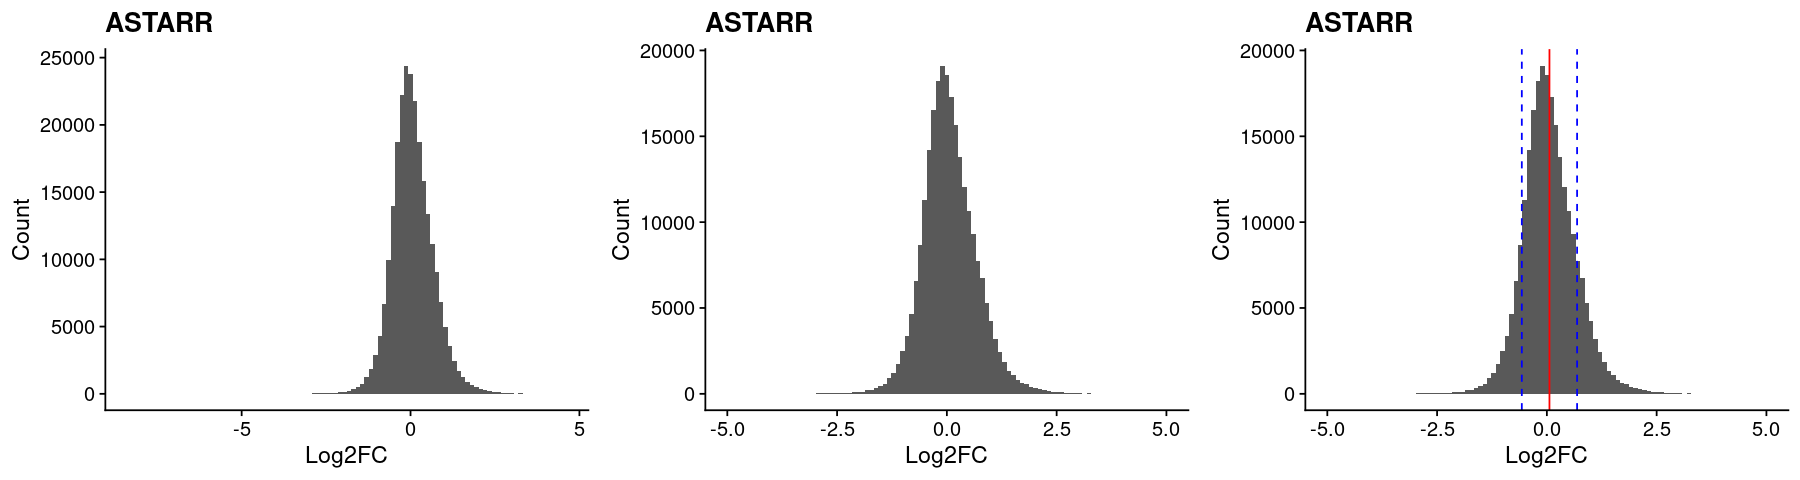

In [110]:
txt_title = "ASTARR"
txt_score = "Log2FC"

dat = dat_peak_screened
dat = dat %>% dplyr::filter(Assay_Type == txt_title)
vec = dat$Score
num_mu  = mean(vec)
num_sd  = sd(vec)
vec_sd1 = num_mu + c(num_sd, -num_sd)
vec_sd2 = num_mu + c(num_sd, -num_sd) * 2
vec_lim = c(-5, 5)

gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(bins = 100) + 
    labs(x=txt_score, y="Count", title=txt_title) +
    theme_cowplot()
gpt_score_ori = gpt

gpt = gpt + xlim(vec_lim)
gpt_score_lim = gpt

gpt = gpt +
    geom_vline(xintercept = num_mu,  linetype="solid",  color="red") +    
    geom_vline(xintercept = vec_sd1, linetype="dashed", color="blue")
gpt_score_sty = gpt

lst = list(
    gpt_score_ori,
    gpt_score_lim,
    gpt_score_sty
)
lst_gpt_score_astarr = lst

options(repr.plot.height=4, repr.plot.width=15)
plot_grid(plotlist = lst, nrow = 1)

Warning message:
“Removed 3 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_bin()`).”


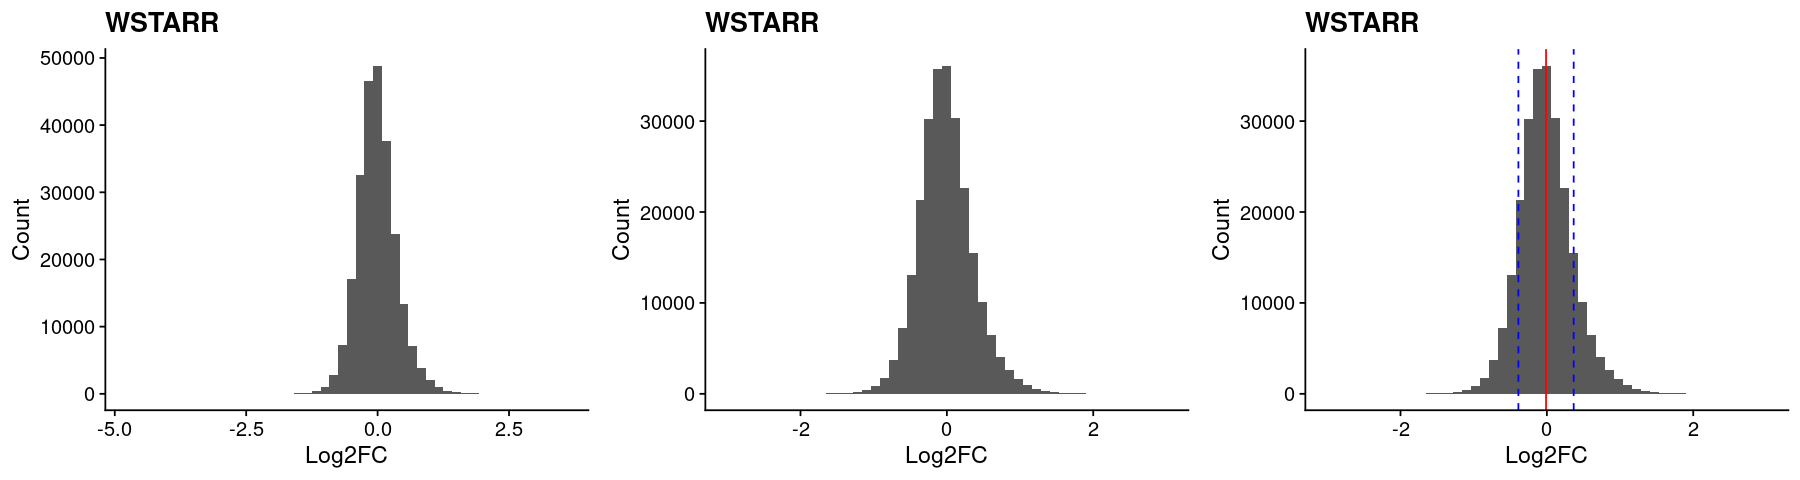

In [90]:
txt_title = "WSTARR"
txt_score = "Log2FC"

dat = dat_peak_screened
dat = dat %>% dplyr::filter(Assay_Type == txt_title)
vec = dat$Score
num_mu  = mean(vec)
num_sd  = sd(vec)
vec_sd1 = num_mu + c(num_sd, -num_sd)
vec_sd2 = num_mu + c(num_sd, -num_sd) * 2
vec_lim = c(-3, 3)

gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(bins = 50) + 
    labs(x=txt_score, y="Count", title=txt_title) +
    theme_cowplot()
gpt_score_ori = gpt

gpt = gpt + xlim(vec_lim)
gpt_score_lim = gpt

gpt = gpt +
    geom_vline(xintercept = num_mu,  linetype="solid",  color="red") +    
    geom_vline(xintercept = vec_sd1, linetype="dashed", color="blue")
gpt_score_sty = gpt

lst = list(
    gpt_score_ori,
    gpt_score_lim,
    gpt_score_sty
)
lst_gpt_score_wstarr = lst

options(repr.plot.height=4, repr.plot.width=15)
plot_grid(plotlist = lst, nrow = 1)

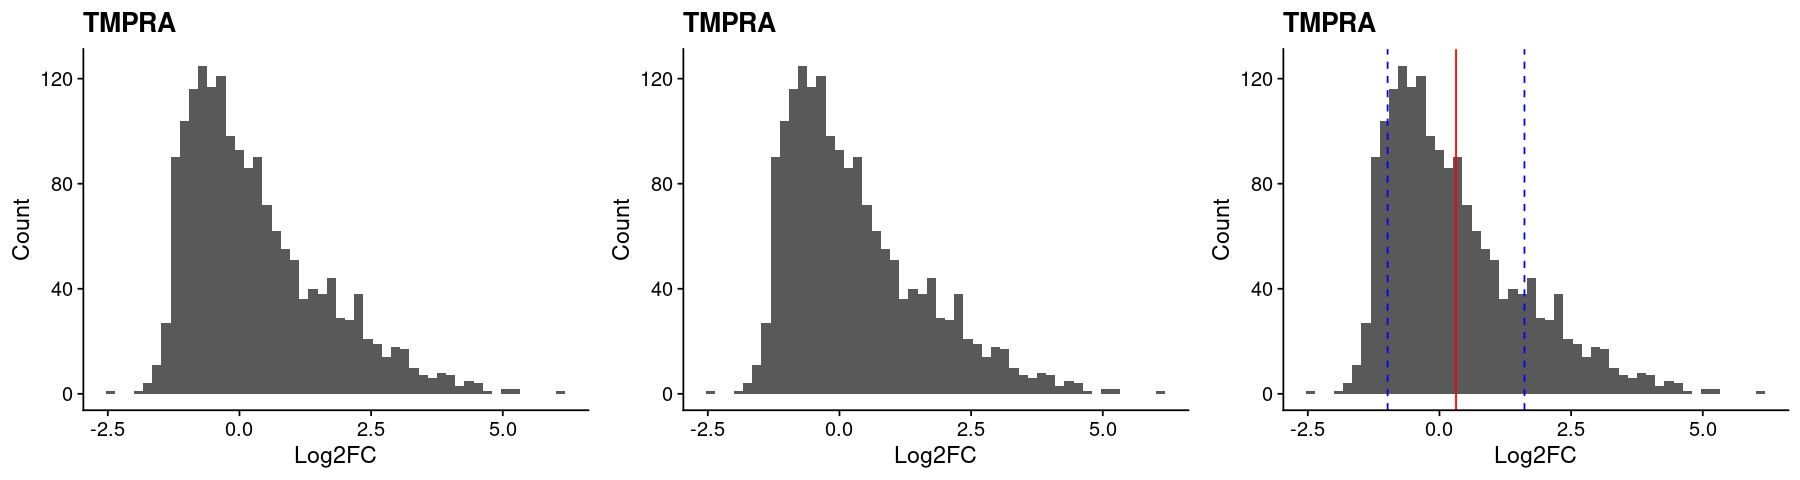

In [91]:
txt_title = "TMPRA"
txt_score = "Log2FC"

dat = dat_peak_screened
dat = dat %>% dplyr::filter(Assay_Type == txt_title)
vec = dat$Score
num_mu  = mean(vec)
num_sd  = sd(vec)
vec_sd1 = num_mu + c(num_sd, -num_sd)
vec_sd2 = num_mu + c(num_sd, -num_sd) * 2
#vec_lim = range(vec)

gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(bins = 50) + 
    labs(x=txt_score, y="Count", title=txt_title) +
    theme_cowplot()
gpt_score_ori = gpt

#gpt = gpt + xlim(vec_lim)
gpt_score_lim = gpt

gpt = gpt +
    geom_vline(xintercept = num_mu,  linetype="solid",  color="red") +    
    geom_vline(xintercept = vec_sd1, linetype="dashed", color="blue")
gpt_score_sty = gpt

lst = list(
    gpt_score_ori,
    gpt_score_lim,
    gpt_score_sty
)
lst_gpt_score_tmpra = lst

options(repr.plot.height=4, repr.plot.width=15)
plot_grid(plotlist = lst, nrow = 1)

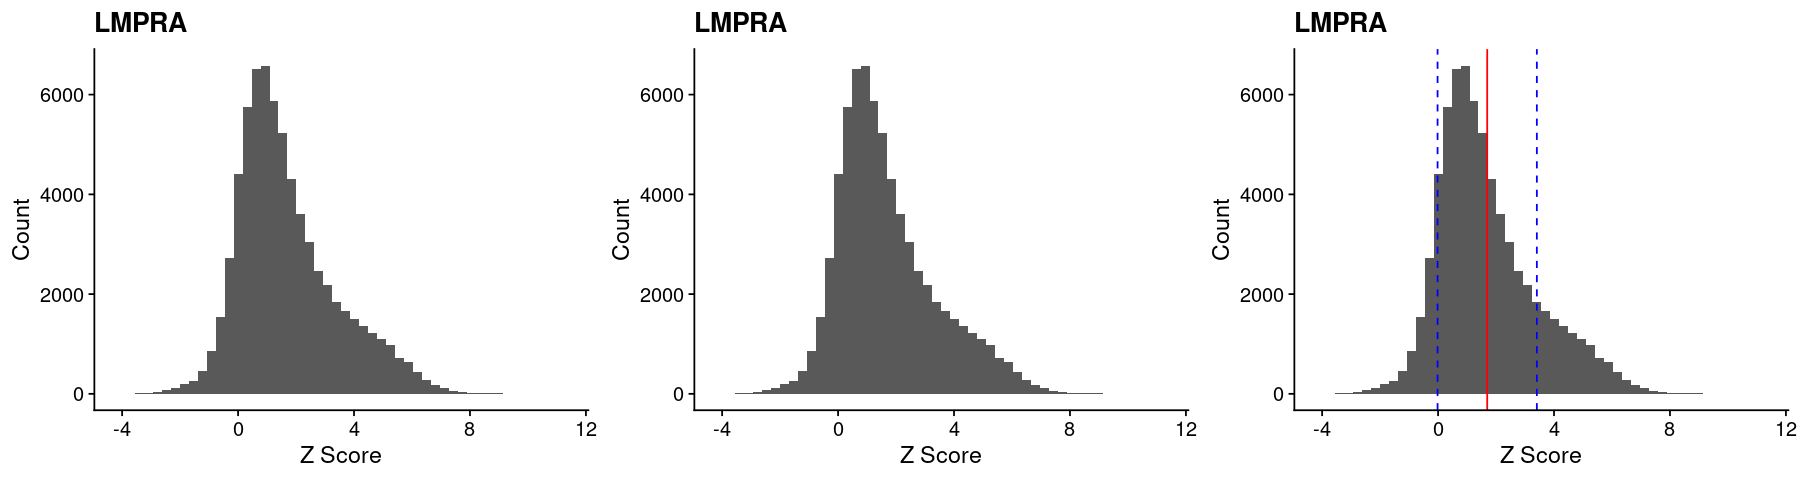

In [92]:
txt_title = "LMPRA"
txt_score = "Z Score"

dat = dat_peak_screened
dat = dat %>% dplyr::filter(Assay_Type == txt_title)
vec = dat$Score
num_mu  = mean(vec)
num_sd  = sd(vec)
vec_sd1 = num_mu + c(num_sd, -num_sd)
vec_sd2 = num_mu + c(num_sd, -num_sd) * 2
vec_lim = range(vec)

gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(bins = 50) + 
    labs(x=txt_score, y="Count", title=txt_title) +
    theme_cowplot()
gpt_score_ori = gpt

#gpt = gpt + xlim(vec_lim)
gpt_score_lim = gpt

gpt = gpt +
    geom_vline(xintercept = num_mu,  linetype="solid",  color="red") +    
    geom_vline(xintercept = vec_sd1, linetype="dashed", color="blue")
gpt_score_sty = gpt

lst = list(
    gpt_score_ori,
    gpt_score_lim,
    gpt_score_sty
)
lst_gpt_score_lmpra = lst

options(repr.plot.height=4, repr.plot.width=15)
plot_grid(plotlist = lst, nrow = 1)

Warning message:
“Removed 23 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 23 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


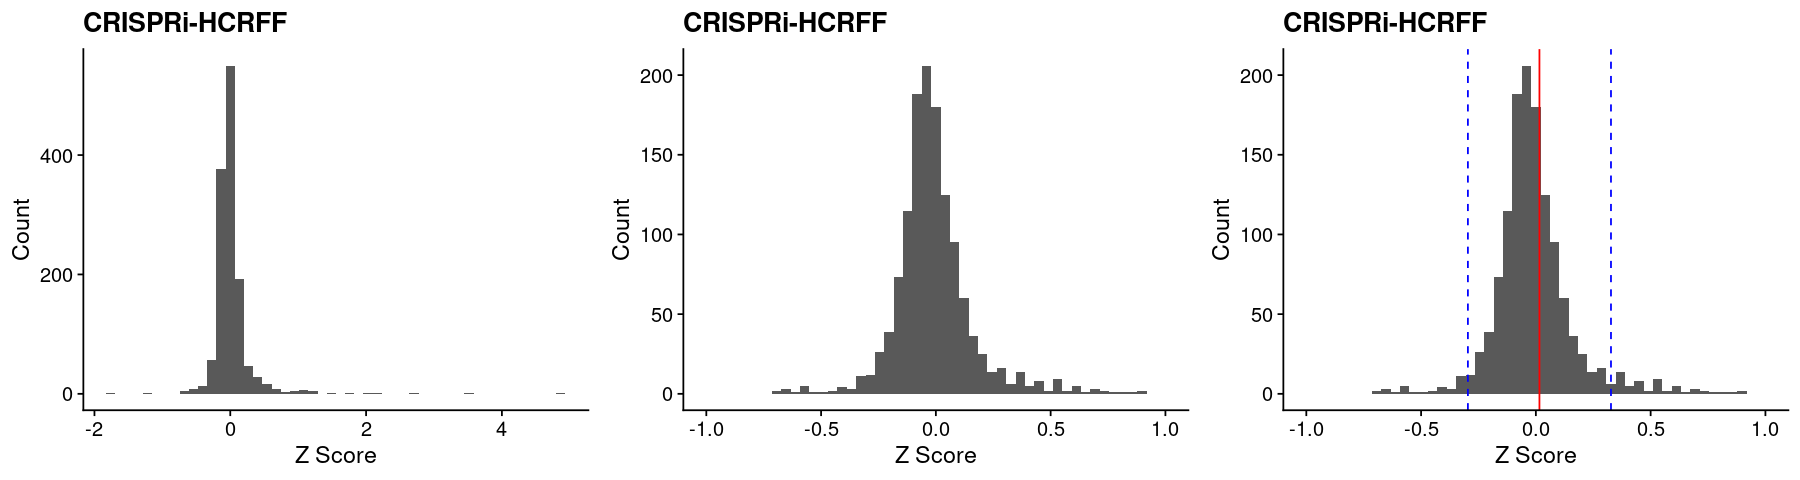

In [93]:
txt_title = "CRISPRi-HCRFF"
txt_score = "Z Score"

dat = dat_peak_screened
dat = dat %>% dplyr::filter(Assay_Type == txt_title)
vec = dat$Score
num_mu  = mean(vec)
num_sd  = sd(vec)
vec_sd1 = num_mu + c(num_sd, -num_sd)
vec_sd2 = num_mu + c(num_sd, -num_sd) * 2
vec_lim = c(-1, 1)

gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(bins = 50) + 
    labs(x=txt_score, y="Count", title=txt_title) +
    theme_cowplot()
gpt_score_ori = gpt

gpt = gpt + xlim(vec_lim)
gpt_score_lim = gpt

gpt = gpt +
    geom_vline(xintercept = num_mu,  linetype="solid",  color="red") +    
    geom_vline(xintercept = vec_sd1, linetype="dashed", color="blue")
gpt_score_sty = gpt

lst = list(
    gpt_score_ori,
    gpt_score_lim,
    gpt_score_sty
)
lst_gpt_score_crispri_hcrff = lst

options(repr.plot.height=4, repr.plot.width=15)
plot_grid(plotlist = lst, nrow = 1)

Warning message:
“Removed 243 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 243 rows containing non-finite values (`stat_bin()`).”


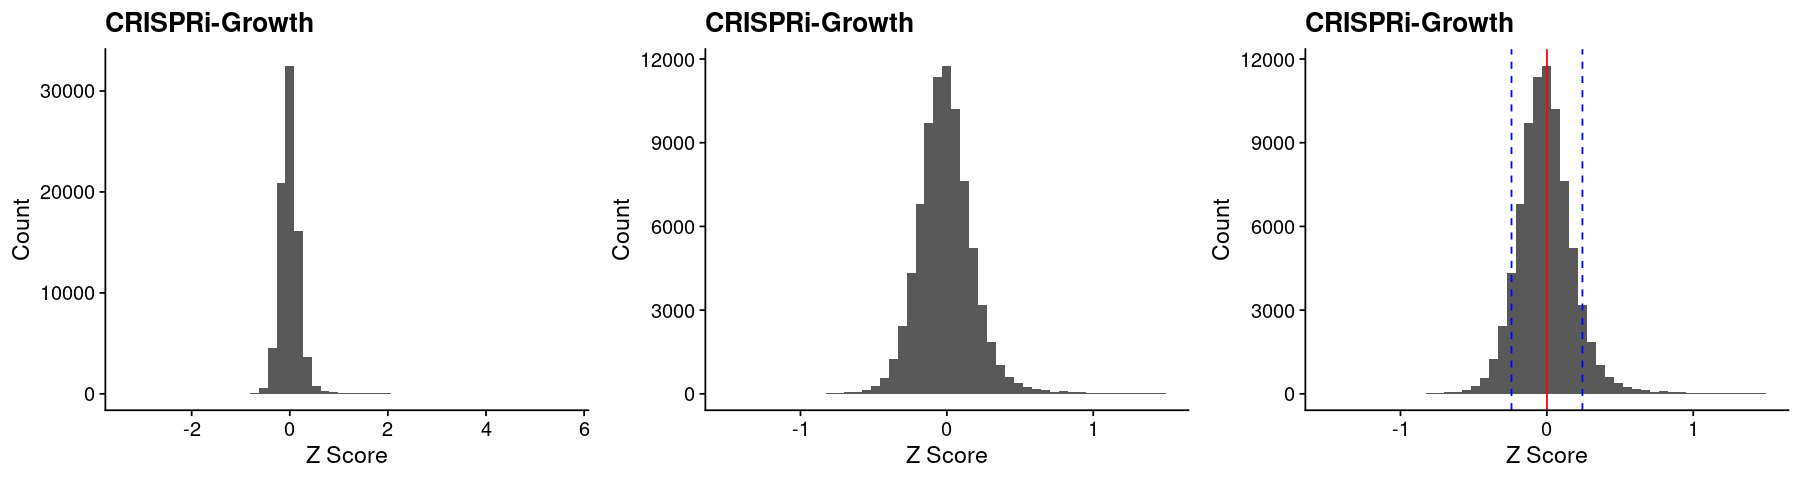

In [94]:
txt_title = "CRISPRi-Growth"
txt_score = "Z Score"

dat = dat_peak_screened
dat = dat %>% dplyr::filter(Assay_Type == txt_title)
vec = dat$Score
num_mu  = mean(vec)
num_sd  = sd(vec)
vec_sd1 = num_mu + c(num_sd, -num_sd)
vec_sd2 = num_mu + c(num_sd, -num_sd) * 2
vec_lim = c(-1.5, 1.5)

gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(bins = 50) + 
    labs(x=txt_score, y="Count", title=txt_title) +
    theme_cowplot()
gpt_score_ori = gpt

gpt = gpt + xlim(vec_lim)
gpt_score_lim = gpt

gpt = gpt +
    geom_vline(xintercept = num_mu,  linetype="solid",  color="red") +    
    geom_vline(xintercept = vec_sd1, linetype="dashed", color="blue")
gpt_score_sty = gpt

lst = list(
    gpt_score_ori,
    gpt_score_lim,
    gpt_score_sty
)
lst_gpt_score_crispri_growth = lst

options(repr.plot.height=4, repr.plot.width=15)
plot_grid(plotlist = lst, nrow = 1)

In [98]:
lst_vec_num_range

$ASTARR
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-8.31132 -0.32792  0.01359  0.05892  0.42169  4.55950 

$`CRISPRi-Growth`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.231664 -0.125790 -0.015193  0.000656  0.100296  5.539906 

$`CRISPRi-HCRFF`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.79602 -0.09309 -0.02741  0.01556  0.05958  4.82946 

$`ENCODE-E2G_Benchmark`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.930000 -0.024425 -0.006095 -0.013355  0.009698  0.208575 

$`ENCODE-E2G_Prediction`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00003 0.06296 0.21908 0.38281 0.74137 1.00000 

$LMPRA
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.9685  0.4997  1.3286  1.6950  2.6032 11.2148 

$TMPRA
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.439058 -0.678092 -0.001937  0.314684  1.003965  6.104344 

$WSTARR
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.71138 -0.25013 -0.03281 -0.01136  0.201

In [111]:
lst_lst_gpt = list(
    "ASTARR" = lst_gpt_score_astarr,
    "WSTARR" = lst_gpt_score_wstarr,
    "TMPRA"  = lst_gpt_score_tmpra,
    "LMPRA"  = lst_gpt_score_lmpra,
    "CRISPRi-HCRFF"  = lst_gpt_score_crispri_hcrff,
    "CRISPRi-Growth" = lst_gpt_score_crispri_growth
)

In [ ]:
options(repr.plot.height=5, repr.plot.width=5)
lst = lst_gpt_pairs_scatter
for (txt in names(lst)){
    fname = paste0("fig_pairs_hex_", txt, ".png")
    gpt = lst[[txt]]
    
    gpt = gpt + theme(legend.position = "None")
    suppressWarnings(print(gpt))
    
    gpt = gpt + labs(x="", y="")
    suppressWarnings(ggsave(fname, gpt, width = 3, height = 3))
}

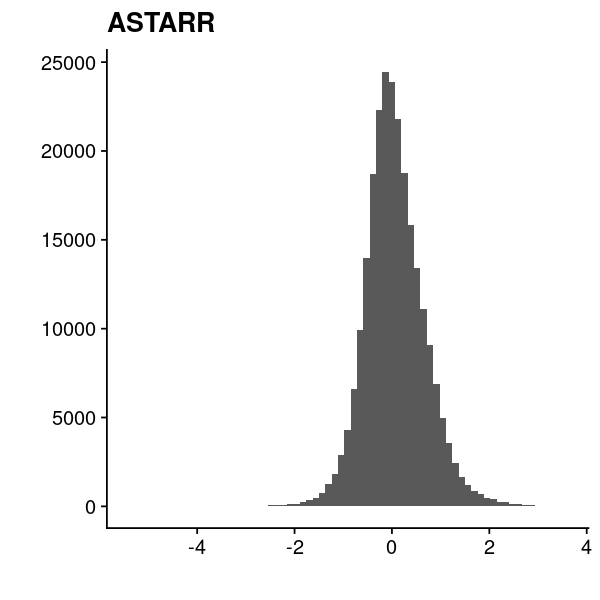

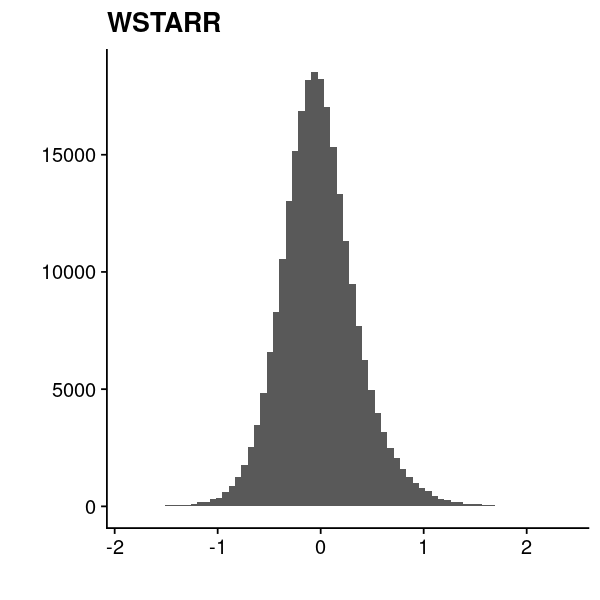

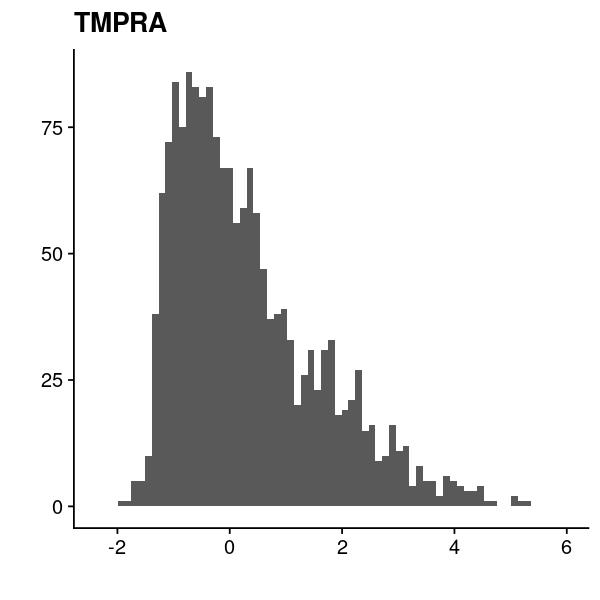

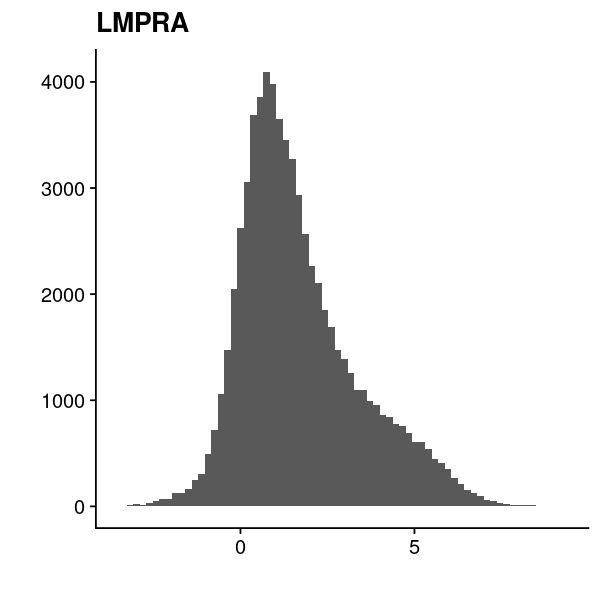

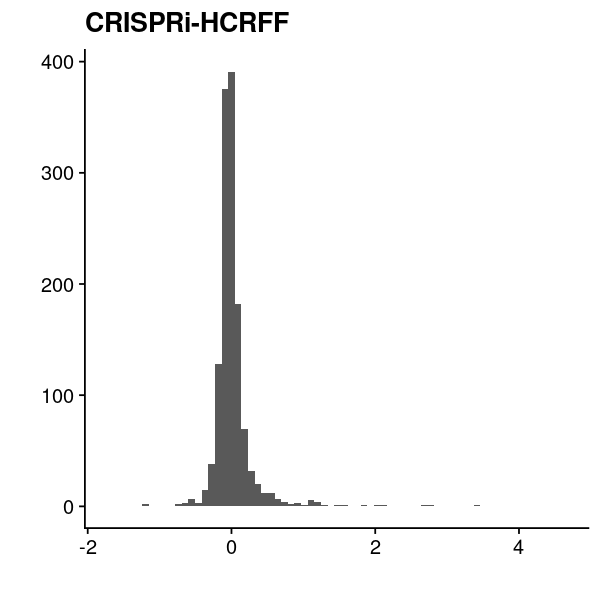

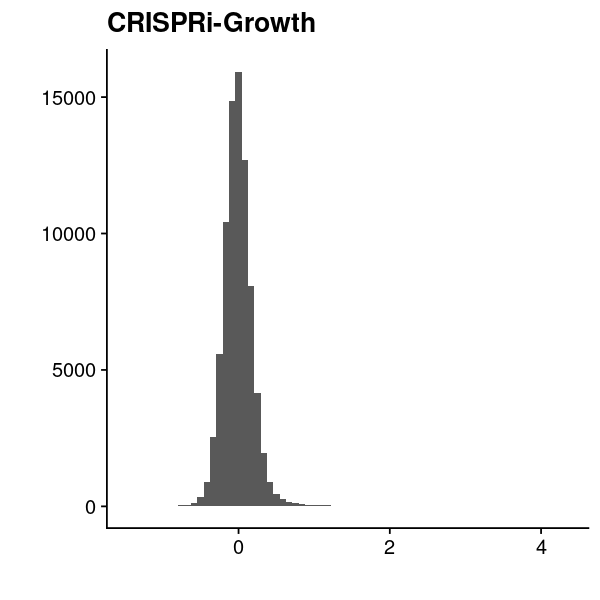

In [209]:
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
for (txt_assay in vec){
    vec_num_score = lst_vec_num_score[[txt_assay]]
    dat_num_score = data.frame(Score = vec_num_score)
    
    num_prob = 0.0001
    vec_num_range = quantile(
        vec_num_score, 
        probs = c(num_prob, 1-num_prob)
    )

    gpt = ggplot(dat_num_score, aes(x=Score)) + 
        geom_histogram(bins = 70) + 
        labs(x="", y="", title=txt_assay) +
        theme_cowplot()
    
    gpt = suppressWarnings(gpt + xlim(vec_num_range))
    suppressWarnings(print(gpt))

    txt   = str_replace_all(txt_assay, "-", "_")
    fname = paste0("fig_histogram_", txt, ".png")
    suppressWarnings(ggsave(fname, gpt, width = 3, height = 3))
}

In [ ]:
vec_txt_assay = c("LMPRA", "ASTARR")


Warning message:
“Removed 43 rows containing non-finite values (`stat_bin()`).”


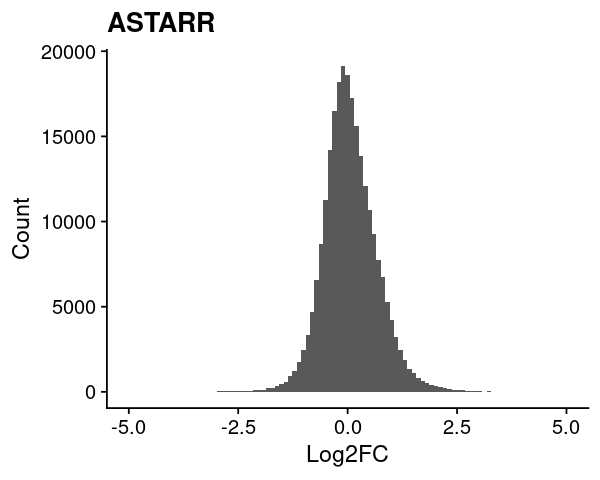

In [112]:
options(repr.plot.height=4, repr.plot.width=5)
lst_lst_gpt[[1]][[2]]

In [113]:
lst_vec_num_range[[txt_assay]]

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-8.31132 -0.32792  0.01359  0.05892  0.42169  4.55950 

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 123426 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


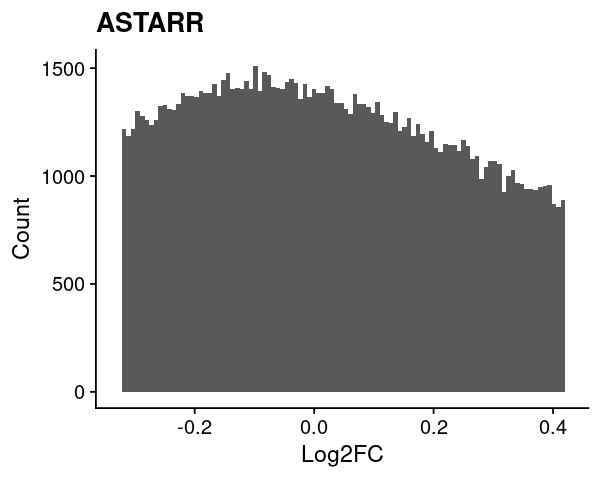

In [114]:
txt_assay = "ASTARR"

vec_num = lst_vec_num_range[[txt_assay]]
lst_gpt = lst_lst_gpt[[txt_assay]]

gpt = lst_gpt[[2]]
vec = c(vec_num[["1st Qu."]], vec_num[["3rd Qu."]])
gpt + xlim(vec)

    0.01%    99.99% 
-5.404704  3.584834 


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 50 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


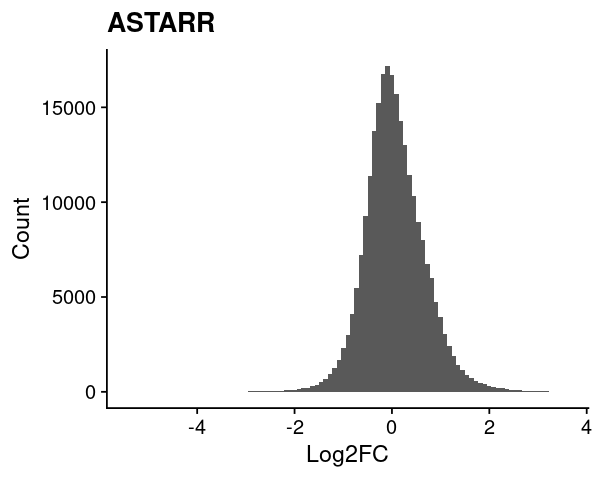

In [116]:
dat = dat_peak_screened
lst = split(dat$Score, dat$Assay_Type)
vec = lst[[txt_assay]]
num = 0.0001
vec = quantile(vec, probs = c(num, 1-num))
print(vec)
gpt + xlim(vec)

In [ ]:
lst = lst_vec_num_range
vec = names(lst)
vec_txt_assay = names

for (txt_assay in

In [ ]:
dat = lst_score_merge
vec = names(lst)
dat = expand.grid(vec, vec)

dat = apply(dat, 1, function(vec_row){
    
    idn1 = vec_row[1]
    idn2 = vec_row[2]
    
    dat = dat_score_merge
    dat = dat %>% 
        dplyr::filter(Assay %in% vec_row) %>% 
        tidyr::spread(Assay, Score) %>% 
        na.omit
    
    vec1 = dat[[idn1]]
    vec2 = dat[[idn2]]
    val_size = length(vec1)
    val_corr = cor(vec1, vec2, method="spearman")
    
    vec = c(idn1, idn2, val_size, val_corr)
    names(vec) = c("Assay1", "Assay2", "Count", "Correlation")
    return(vec)
})
dat = as.data.frame(t(dat))
dat = dat %>% dplyr::mutate(Correlation = as.double(Correlation))

dat_score_corr = dat
print(dim(dat))
dat

Warning message:
“Removed 37 rows containing non-finite values (`stat_binhex()`).”


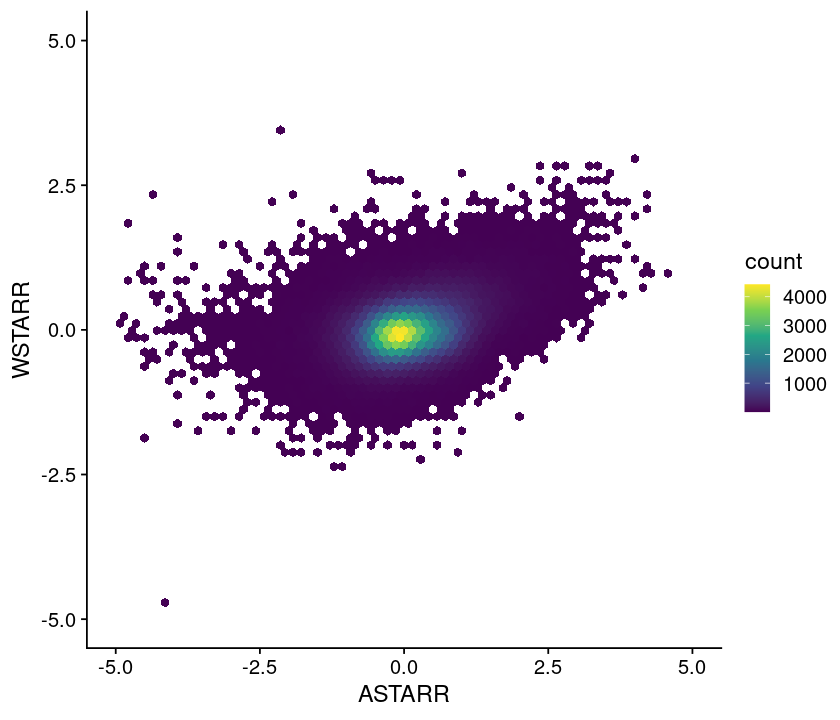

In [26]:
vec_txt_assay = c("ASTARR", "WSTARR")
dat = dat_peak_scores
dat = dat %>% dplyr::select({{vec_txt_assay}}) %>% na.omit

gpt = ggplot(dat, aes(x=ASTARR, y=WSTARR)) +
    geom_hex(bins=70) +
    scale_fill_viridis_c() +
    theme_cowplot() +
    xlim(-5, 5) +
    ylim(-5, 5)

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

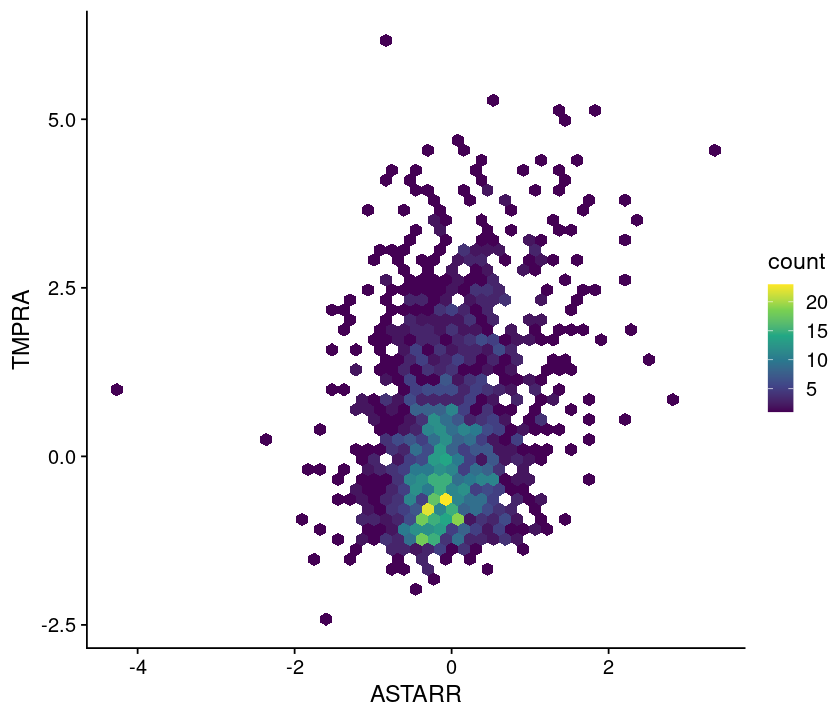

In [25]:
vec_txt_assay = c("ASTARR", "TMPRA")
dat = dat_peak_scores
dat = dat %>% dplyr::select({{vec_txt_assay}}) %>% na.omit

gpt = ggplot(dat, aes(x=ASTARR, y=TMPRA)) +
    geom_hex(bins=50) +
    scale_fill_viridis_c() +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=7)
print(gpt)

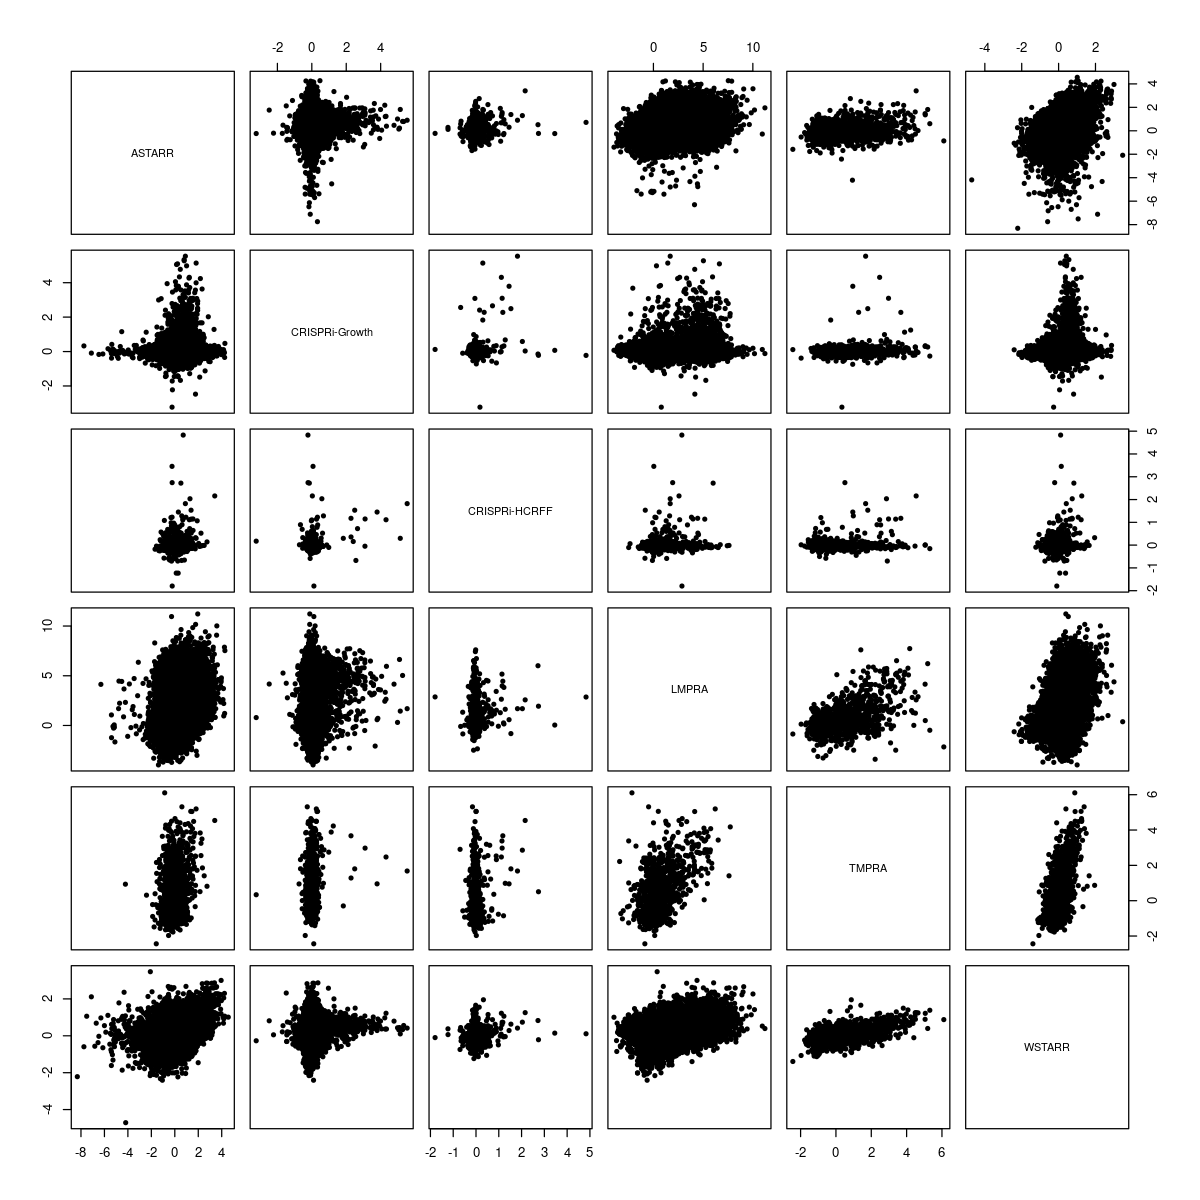

In [5]:
options(repr.plot.height=10, repr.plot.width=10)
pairs(dat, pch = 20)